In [ ]:
from linear_regression import lr_fit, lr_predict
from linear_regression.utils import mse
from polynomial_regression import PolynomialRegression
import csv
import numpy as np

In [ ]:
# load training data from csv file
file_loc = "data/regression_train.csv"
with open(file_loc, 'r') as x:
    data = list(csv.reader(x, delimiter = ","))

# remove headers and convert to numbers
headers = data[0] 
data = np.array(data[1: ], dtype = float)[:, 1: ]

# number of records -> n
n = data.shape[0]
print(f"Training data with {n} records loaded")

# separate data into features (x) and labels (y)
features = data[:, : -1]
labels = data[:, -1].reshape((n, 1))
print("Data features: ", ", ".join(headers[: -1]))
print("Data label: ", headers[-1])
print("")

In [ ]:
# use the same training data to fit a linear regression model
print("Fitting training data to a linear regression model")
beta, bias, _ = lr_fit(features, labels)
print("")

In [ ]:
# initialize polynomial regression with quadratic leading term
pr = PolynomialRegression(max_power = 2)

# fit model to training data using appropriate learning rate and regularization
print("Fitting training data to a polynomial regression model")
p_beta, p_bias, _ = pr.fit(features, labels, l_rate = 0.05, lamda = 1)
print("")

In [ ]:
# load testing data similarly to evaluate trained models
with open(file_loc.replace("train", "test"), 'r') as f:
    test = list(csv.reader(f, delimiter = ","))
test = np.array(test[1: ], dtype = float)[:, 1: ]

n_test = test.shape[0]
features_test = test[:, : -1]
labels_test = test[:, -1].reshape((n_test, 1))
print(f"Testing data with {n_test} records loaded")
print("")

In [ ]:
# compute predictions using the polynomial regression model
labels_pred = pr.predict(features_test)

# mean squared error as an evaluation metric
mse(labels_test, labels_pred)

In [ ]:
labels_pred = lr_predict(beta = beta, bias = bias, x = features_test)
mse(labels_test, labels_pred)

In [ ]:
beta.shape

In [18]:
lr_fit(np.array([2, 3, 4, 5, 10]).reshape((5, 1)), np.array([6, 9, 12, 15, 30]).reshape((5, 1)), l_rate = 0.05, rel_stop = 1e-3)

Convergence after 2378 epochs
Mean Squared Error after training: 1.5595780096219403e-27


(array([[3.]]),
 7.779284424849223e-14,
 [277.2,
  92.54736000000003,
  30.920273855999973,
  10.351941584371176,
  3.4866395419867082,
  1.1946268768183241,
  0.4289296659897964,
  0.17264578455274832,
  0.08639233492861258,
  0.056902716851727375,
  0.046374734097328583,
  0.04219180470520162,
  0.040142841779271514,
  0.03882203100941194,
  0.03775980375133793,
  0.036799064931527015,
  0.0358870141767434,
  0.03500566765728027,
  0.03414867012063161,
  0.033313555888374445,
  0.03249916581857175,
  0.03170478503301549,
  0.030929854940153392,
  0.030173876929230695,
  0.029436380037859422,
  0.02871690997484691,
  0.02801502527472397,
  0.027330295836858087,
  0.02666230226474327,
  0.026010635476574142,
  0.025374896410485483,
  0.02475469576541521,
  0.024149653757783975,
  0.02355939988728912,
  0.022983572709477602,
  0.02242181961423195,
  0.021873796609785286,
  0.021339168112056706,
  0.020817606739148842,
  0.02030879311087099,
  0.01981241565316614,
  0.01932817040731509,


Training data with 107 records loaded
Data features:  ID, height, weight, age
Data label:  BicepC

Fitting training data to a linear regression model:
Convergence after 4209 epochs
Mean Squared Error after training: 4.2759383694699356

Fitting training data to a polynomial regression model:
Convergence after 405 epochs
Mean Squared Error after training: 5.869995239489751

Testing data with 10 records loaded
Model evaluation on loaded testing data: 
Model evaluated on trained linear regression model with mean squared error:  4.861747392508405
Model evaluated on trained polynomial regression model with mean squared error:  2.753624192263525


Text(0, 0.5, 'Predicted BicepC')

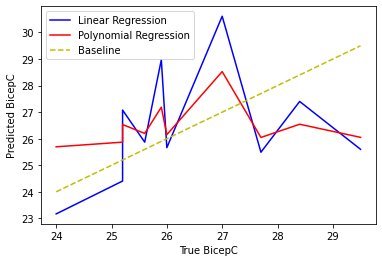

In [2]:
from linear_regression import lr_fit, lr_predict
from linear_regression.utils import mse
from polynomial_regression import PolynomialRegression
import matplotlib.pyplot as plt
import numpy as np
import csv

# load training data from csv file
file_loc = "data/regression_train.csv"
with open(file_loc, 'r') as x:
    data = list(csv.reader(x, delimiter = ","))

# remove headers and convert to numbers
headers = data[0] 
data = np.array(data[1: ], dtype = float)[:, 1: ]

# number of records -> n
n = data.shape[0]
print(f"Training data with {n} records loaded")

# separate data into features (x) and labels (y)
features = data[:, : -1]
labels = data[:, -1].reshape((n, 1))
print("Data features: ", ", ".join(headers[: -1]))
print("Data label: ", headers[-1])
print("")

# use the same training data to fit a linear regression model
print("Fitting training data to a linear regression model:")
beta, bias, _ = lr_fit(features, labels, l_rate = 1e-5)
print("")

# initialize polynomial regression with quadratic leading term
pr = PolynomialRegression(max_power = 2)

# fit model to training data using appropriate learning rate and regularization
print("Fitting training data to a polynomial regression model:")
p_beta, p_bias, _ = pr.fit(features, labels, l_rate = 0.03, lamda = 2)
print("")

# load testing data similarly to evaluate trained models
with open(file_loc.replace("train", "test"), 'r') as f:
    test = list(csv.reader(f, delimiter = ","))
test = np.array(test[1: ], dtype = float)[:, 1: ]

n_test = test.shape[0]
features_test = test[:, : -1]
labels_test = test[:, -1].reshape((n_test, 1))
print(f"Testing data with {n_test} records loaded")
print("Model evaluation on loaded testing data: ")

# compute predictions and errors for the linear regression model
lin_pred = lr_predict(beta = beta, bias = bias, x = features_test)
mse_lr = mse(labels_test, lin_pred)
print("Model evaluated on trained linear regression model with mean squared error: ", mse_lr)

# compute predictions and error similarly using the polynomial regression model
pr_pred = pr.predict(features_test)
mse_pr = mse(labels_test, pr_pred)
print("Model evaluated on trained polynomial regression model with mean squared error: ", mse_pr)

x_s, y_lin = zip(*sorted(zip(labels_test, lin_pred)))
_, y_pr = zip(*sorted(zip(labels_test, pr_pred)))

plt.plot(x_s, y_lin, "b-")
plt.plot(x_s, y_pr,"r-")
plt.plot(x_s, x_s, "y--")
plt.legend(("Linear Regression", "Polynomial Regression", "Baseline"))
plt.xlabel("True BicepC")
plt.ylabel("Predicted BicepC")
plt.show()